Clustering New Groups Data  (KNN,SVD, NMF)

**Import Packages**

In [0]:
## Standard Packages
import numpy as np
import random
from time import time
from matplotlib import pyplot as plt
from warnings import simplefilter

## SKLearn Packages
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import text

## Data Pre-processing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing

## Classifiers
from sklearn.cluster import KMeans

## Evaluation Metrics
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score


**Define Functions**

In [0]:
def print_scores(labels, predicted):
  print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, predicted))
  print("Completeness: %0.3f" % metrics.completeness_score(labels, predicted))
  print("V-measure: %0.3f" % metrics.v_measure_score(labels, predicted))
  print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, predicted))
  print("Adjusted Mutual Info Score: %.3f" % metrics.adjusted_mutual_info_score(labels, predicted))
  
def draw_scatter(vects, predictions, title):
  plt.subplot(221)
  plt.scatter(vects[:, 0], vects[:, 1], c=predictions)
  plt.title(title)




**Data Loading**

In [0]:
t0 = time()

c_RANDOM_SEED = 42
c_TOPIC1_LEN = 4

np.random.seed(c_RANDOM_SEED)
random.seed(c_RANDOM_SEED)

# Categories we want to fetch
categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics', 'comp.sys.mac.hardware', 'comp.os.ms-windows.misc',
              'rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey']

# Fetch the news group data set for specififed categories
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=c_RANDOM_SEED)

# Split into 2 Classes
labels = np.copy(newsgroups.target)
labels1 = np.copy(newsgroups.target)

labels[labels < c_TOPIC1_LEN] = 0
labels[labels != 0] = 1

labels1[labels1 < c_TOPIC1_LEN] = 1
labels1[labels1 != 1] = 0
print("done in %fs" % (time() - t0))


done in 0.286785s



**Data Preparation** 

In [0]:
t0 = time()

#Create TF-IDF matrix with min_df=3 using english stopwords
vectorizer = TfidfVectorizer(stop_words='english', min_df=3)
tf_idf = vectorizer.fit_transform(newsgroups.data)
print(tf_idf.shape)
print("done in %fs" % (time() - t0))



(7882, 27768)
done in 1.598933s


**Classifier (K-Means) **

In [0]:
t0 = time()

# Fit & Predict
predicted = KMeans(n_clusters=2, init='k-means++', max_iter=10, n_init=30,random_state=0).fit_predict(tf_idf)

# Create contingency matrix
print(contingency_matrix(labels, predicted))
print(contingency_matrix(labels1, predicted))
print("done in %fs" % (time() - t0))


[[   4 3899]
 [1718 2261]]
[[1718 2261]
 [   4 3899]]


**Classifier Performance**

In [0]:
simplefilter(action='ignore', category=FutureWarning)

# Print evaluation metrics
print_scores(labels, predicted)

Homogeneity: 0.254
Completeness: 0.335
V-measure: 0.289
Adjusted Rand-Index: 0.181
Adjusted Mutual Info Score: 0.254


**Plot Percent of Variance for Top Principal Components**

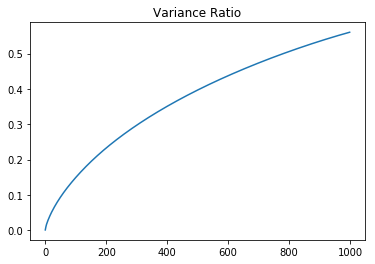

done in 32.011291s


In [0]:
t0 = time()

#Run SVD on TF IDF Matrix
svd = TruncatedSVD(n_components=1000, random_state=c_RANDOM_SEED)
svd_vectors = svd.fit_transform(tf_idf)

#Plot the variance ratio
plt.title("Variance Ratio")
plt.plot(svd.explained_variance_ratio_.cumsum())
plt.show()

print("done in %fs" % (time() - t0))

**NMF Prep**

r = 1 done in 0.868s
r = 2 done in 1.795s
r = 3 done in 1.956s
r = 5 done in 1.957s
r = 10 done in 5.913s
r = 20 done in 8.201s
r = 30 done in 13.677s
r = 50 done in 42.287s
r = 100 done in 161.859s
r = 300 done in 1403.769s


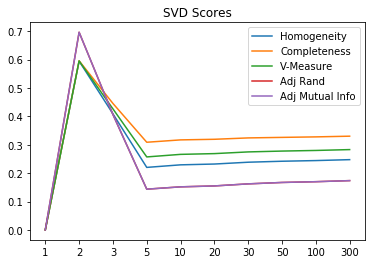

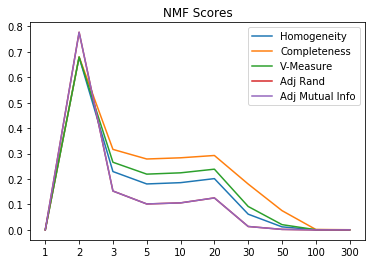

In [0]:


from sklearn.decomposition import NMF

r_val = [1,2,3,5,10,20,30,50,100,300]
r_axis = []
for r in r_val:
  r_axis.append(str(r))

svd_scores = []
nmf_scores = []

def scores_only(y_true, y_pred):
  return [homogeneity_score(y_true, y_pred), 
         completeness_score(y_true, y_pred),
         v_measure_score(y_true, y_pred),
         adjusted_rand_score(y_true, y_pred),
         adjusted_rand_score(y_true, y_pred)]

for r in r_val:
  t0 = time()
  svd = TruncatedSVD(n_components=r)
  svd_X_reduced = svd.fit_transform(tf_idf)
  svd_predict = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(svd_X_reduced)
  svd_scores.append(scores_only(labels, svd_predict))

  nmf = NMF(n_components=r)
  nmf_X_reduced = nmf.fit_transform(tf_idf)
  nmf_predict = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(nmf_X_reduced)
  nmf_scores.append(scores_only(labels, nmf_predict))
  print("r =", r, "done in %0.3fs" % (time() - t0))
  
plt.plot(r_axis, svd_scores)
plt.title('SVD Scores')
plt.legend(['Homogeneity','Completeness','V-Measure','Adj Rand','Adj Mutual Info'])
plt.show()

plt.plot(r_axis, nmf_scores)
plt.title('NMF Scores')
plt.legend(['Homogeneity','Completeness','V-Measure','Adj Rand','Adj Mutual Info'])
plt.show()

**Visualize Cluster Best Results for SVD and NMF**

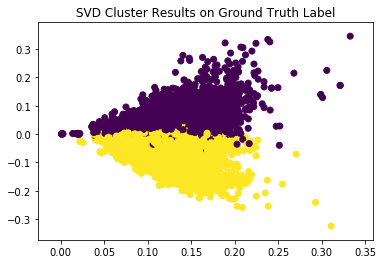

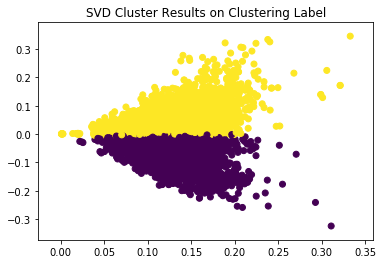

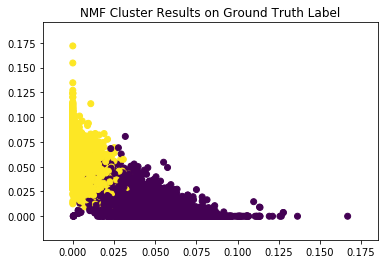

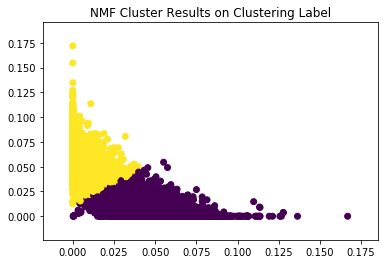

In [0]:
from sklearn.decomposition import NMF
r_best = 2

svd = TruncatedSVD(n_components=r_best)
svd_X_reduced = svd.fit_transform(tf_idf)
svd_predict = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(svd_X_reduced)

nmf = NMF(n_components=r_best)
nmf_X_reduced = nmf.fit_transform(tf_idf)
nmf_predict = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(nmf_X_reduced)

def draw_scatter(x_reduced, y_pred, title):
  plt.scatter(x_reduced[:,0], x_reduced[:,1], c=y_pred)
  plt.title(title)
  plt.show()

draw_scatter(svd_X_reduced, labels, 'SVD Cluster Results on Ground Truth Label')
draw_scatter(svd_X_reduced, svd_predict, 'SVD Cluster Results on Clustering Label')
draw_scatter(nmf_X_reduced, labels, 'NMF Cluster Results on Ground Truth Label')
draw_scatter(nmf_X_reduced, nmf_predict, 'NMF Cluster Results on Clustering Label')

**Visualize Transformed Data vs. Clusting Label**

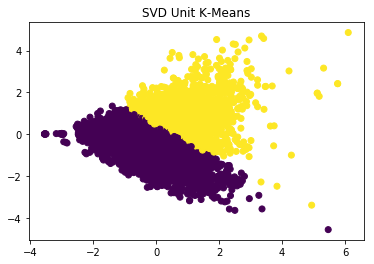

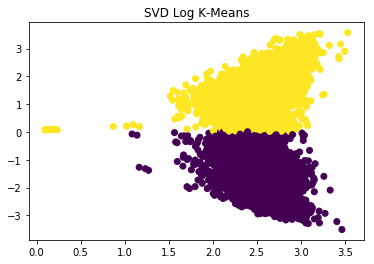

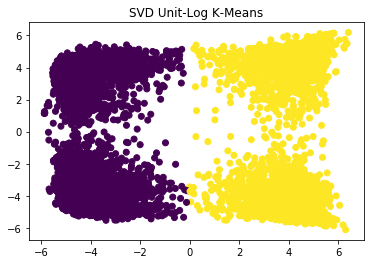

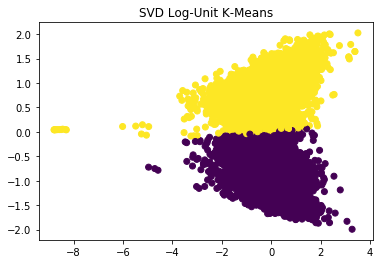

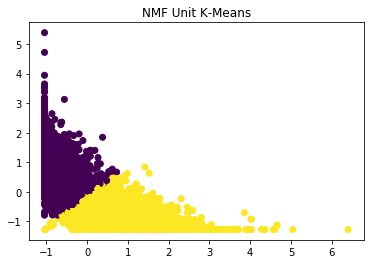

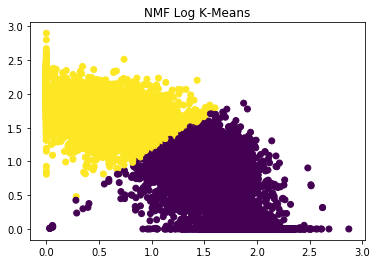

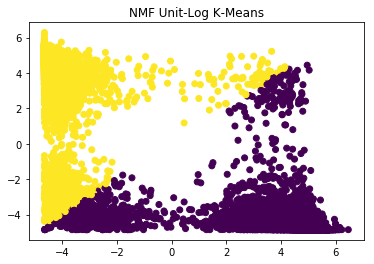

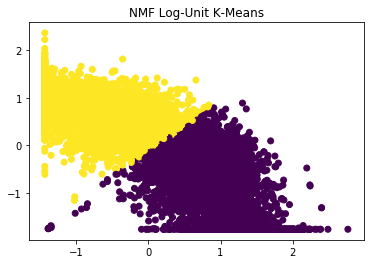

In [0]:
from sklearn import preprocessing

def non_linear_transform(x, c):
  return np.sign(x) * (np.log(np.absolute(x) + c) - np.log(c))

c = 0.01

# SVD Plotting
svd_vect_unit = preprocessing.scale(svd_X_reduced)
svd_unit_pred = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(svd_vect_unit)
draw_scatter(svd_vect_unit, svd_unit_pred, "SVD Unit K-Means")

svd_vect_log = non_linear_transform(svd_X_reduced, c)
svd_log_pred = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(svd_vect_log)
draw_scatter(svd_vect_log, svd_log_pred, "SVD Log K-Means")

svd_vect_ul = non_linear_transform(svd_vect_unit, c)
svd_ul_pred = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(svd_vect_ul)
draw_scatter(svd_vect_ul, svd_ul_pred, "SVD Unit-Log K-Means")

svd_vect_lu = preprocessing.scale(svd_vect_log)
svd_lu_pred = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(svd_vect_lu)
draw_scatter(svd_vect_lu, svd_lu_pred, "SVD Log-Unit K-Means")

#NMF Plotting
nmf_vect_unit = preprocessing.scale(nmf_X_reduced)
nmf_unit_pred = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(nmf_vect_unit)
draw_scatter(nmf_vect_unit, nmf_unit_pred, "NMF Unit K-Means")

nmf_vect_log = non_linear_transform(nmf_X_reduced, c)
nmf_log_pred = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(nmf_vect_log)
draw_scatter(nmf_vect_log, nmf_log_pred, "NMF Log K-Means")

nmf_vect_ul = non_linear_transform(nmf_vect_unit, c)
nmf_ul_pred = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(nmf_vect_ul)
draw_scatter(nmf_vect_ul, nmf_ul_pred, "NMF Unit-Log K-Means")

nmf_vect_lu = preprocessing.scale(nmf_vect_log)
nmf_lu_pred = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(nmf_vect_lu)
draw_scatter(nmf_vect_lu, nmf_lu_pred, "NMF Log-Unit K-Means")

** Visualize Transformed Data vs. Clusting Label**

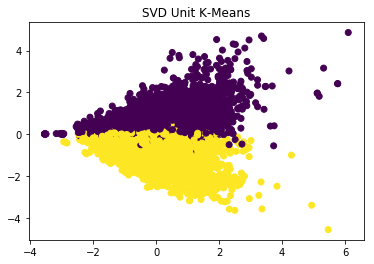

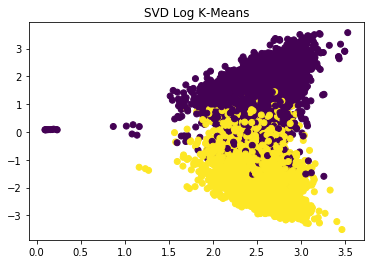

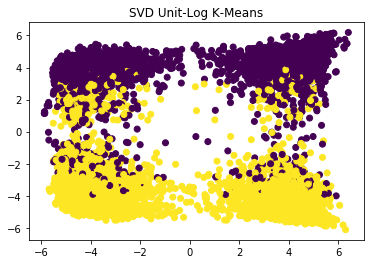

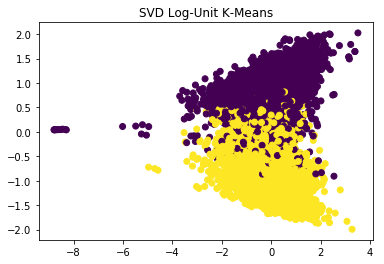

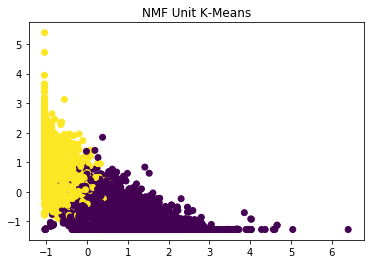

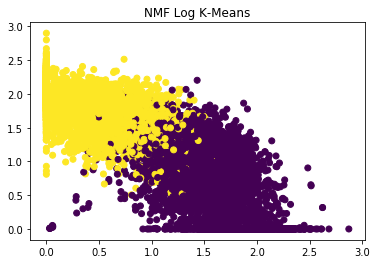

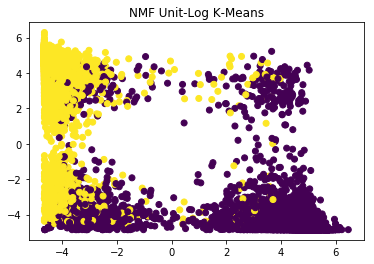

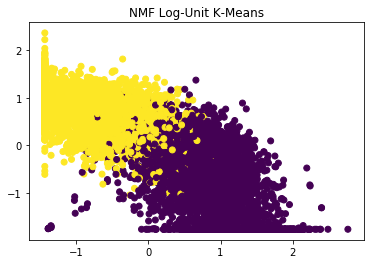

In [0]:
from sklearn import preprocessing

def non_linear_transform(x, c):
  return np.sign(x) * (np.log(np.absolute(x) + c) - np.log(c))

c = 0.01

# SVD Plotting
svd_vect_unit = preprocessing.scale(svd_X_reduced)
svd_unit_pred = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(svd_vect_unit)
draw_scatter(svd_vect_unit, labels, "SVD Unit K-Means")

svd_vect_log = non_linear_transform(svd_X_reduced, c)
svd_log_pred = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(svd_vect_log)
draw_scatter(svd_vect_log, labels, "SVD Log K-Means")

svd_vect_ul = non_linear_transform(svd_vect_unit, c)
svd_ul_pred = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(svd_vect_ul)
draw_scatter(svd_vect_ul, labels, "SVD Unit-Log K-Means")

svd_vect_lu = preprocessing.scale(svd_vect_log)
svd_lu_pred = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(svd_vect_lu)
draw_scatter(svd_vect_lu, labels, "SVD Log-Unit K-Means")

#NMF Plotting
nmf_vect_unit = preprocessing.scale(nmf_X_reduced)
nmf_unit_pred = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(nmf_vect_unit)
draw_scatter(nmf_vect_unit, labels, "NMF Unit K-Means")

nmf_vect_log = non_linear_transform(nmf_X_reduced, c)
nmf_log_pred = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(nmf_vect_log)
draw_scatter(nmf_vect_log, labels, "NMF Log K-Means")

nmf_vect_ul = non_linear_transform(nmf_vect_unit, c)
nmf_ul_pred = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(nmf_vect_ul)
draw_scatter(nmf_vect_ul, labels, "NMF Unit-Log K-Means")

nmf_vect_lu = preprocessing.scale(nmf_vect_log)
nmf_lu_pred = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(nmf_vect_lu)
draw_scatter(nmf_vect_lu,labels, "NMF Log-Unit K-Means")

**Clustering Measures for Transformed Matrix**

In [0]:
print('SVD Unit Scores')
print_scores(labels, svd_unit_pred)
print('\n')

print('SVD Log Scores')
print_scores(labels, svd_log_pred)
print('\n')

print('SVD Unit-Log Scores')
print_scores(labels, svd_ul_pred)
print('\n')

print('SVD Log-Unit Scores')
print_scores(labels, svd_lu_pred)
print('\n')

print('NMF Unit Scores')
print_scores(labels, nmf_unit_pred)
print('\n')

print('NMF Log Scores')
print_scores(labels, nmf_log_pred)
print('\n')

print('NMF Unit-Log Scores')
print_scores(labels, nmf_ul_pred)
print('\n')

print('NMF Log-Unit Scores')
print_scores(labels, nmf_lu_pred)
print('\n')

SVD Unit Scores
Homogeneity: 0.228
Completeness: 0.257
V-measure: 0.242
Adjusted Rand-Index: 0.244
Adjusted Mutual Info Score: 0.228


SVD Log Scores
Homogeneity: 0.609
Completeness: 0.609
V-measure: 0.609
Adjusted Rand-Index: 0.716
Adjusted Mutual Info Score: 0.609


SVD Unit-Log Scores
Homogeneity: 0.000
Completeness: 0.000
V-measure: 0.000
Adjusted Rand-Index: -0.000
Adjusted Mutual Info Score: -0.000


SVD Log-Unit Scores
Homogeneity: 0.610
Completeness: 0.610
V-measure: 0.610
Adjusted Rand-Index: 0.717
Adjusted Mutual Info Score: 0.610


NMF Unit Scores
Homogeneity: 0.683
Completeness: 0.686
V-measure: 0.684
Adjusted Rand-Index: 0.773
Adjusted Mutual Info Score: 0.683


NMF Log Scores
Homogeneity: 0.676
Completeness: 0.679
V-measure: 0.677
Adjusted Rand-Index: 0.765
Adjusted Mutual Info Score: 0.676


NMF Unit-Log Scores
Homogeneity: 0.696
Completeness: 0.696
V-measure: 0.696
Adjusted Rand-Index: 0.793
Adjusted Mutual Info Score: 0.696


NMF Log-Unit Scores
Homogeneity: 0.686
Comp

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


**K Means for 20 Categories**

In [0]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
np.random.seed(42)
import random
random.seed(42)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.feature_extraction.text import TfidfTransformer
from time import time
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score
from sklearn.metrics import v_measure_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score

dataset = fetch_20newsgroups(subset='all',
shuffle=True, random_state=42)

count_vect = CountVectorizer(min_df=3, stop_words='english')
X_counts = count_vect.fit_transform(dataset.data)

t0 = time()

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
#predict = KMeans(n_clusters=20, random_state=0).fit_predict(X_tfidf)

#print("Kmeans Calc done in %0.3fs" % (time() - t0))

def plot_contingency_table(y_true, y_pred, classes, cmap=plt.cm.Blues):
    title = 'Contingency Table'
    cm = contingency_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]
    print('Contingency Table')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=0, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    '''fmt = '.0f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax'''
  
label = dataset.target
#class_names = np.unique(dataset.target)
#plot_contingency_table(label, predict, classes=class_names)

def scores(y_true, y_pred):
  print("Homogeneity Score: {0:.3%}".format(homogeneity_score(y_true, y_pred)))
  print("Completeness Score: {0:.3%}".format(completeness_score(y_true, y_pred)))
  print("V-measure Score: {0:.3%}".format(v_measure_score(y_true, y_pred)))
  print("Adjusted Rand Index: {0:.3%}".format(adjusted_rand_score(y_true, y_pred)))
  print("Adjusted Mutual Information Score: {0:.3%}".format(adjusted_mutual_info_score(y_true, y_pred)))

#scores(label, predict)

**Best Combinations Based on Dimensionality Techniques**

r = 1 done in 2.078s
r = 2 done in 5.492s
r = 3 done in 8.373s
r = 4 done in 8.647s
r = 5 done in 10.737s
r = 6 done in 7.953s
r = 7 done in 12.703s
r = 8 done in 11.481s
r = 9 done in 12.027s
r = 10 done in 12.564s
r = 11 done in 14.186s
r = 12 done in 15.660s
r = 13 done in 20.668s
r = 14 done in 23.242s
r = 15 done in 14.721s
r = 16 done in 15.457s
r = 17 done in 13.184s
r = 18 done in 28.341s
r = 19 done in 13.422s
r = 20 done in 14.612s
r = 21 done in 16.308s
r = 22 done in 16.576s
r = 23 done in 16.900s
r = 24 done in 17.490s
r = 25 done in 18.880s


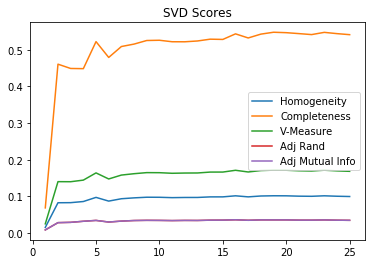

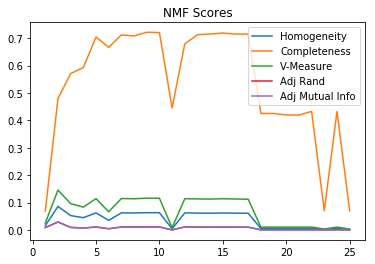

In [0]:
from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

r_val = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
r_axis = r_val
#[]
#for r in r_val:
#  r_axis.append(str(r))

svd_scores = []
nmf_scores = []

def scores_only(y_true, y_pred):
  return [homogeneity_score(y_true, y_pred), 
         completeness_score(y_true, y_pred),
         v_measure_score(y_true, y_pred),
         adjusted_rand_score(y_true, y_pred),
         adjusted_rand_score(y_true, y_pred)]

for r in r_val:
  t0 = time()
  svd = TruncatedSVD(n_components=r)
  svd_X_reduced = svd.fit_transform(X_tfidf)
  svd_predict = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(svd_X_reduced)
  svd_scores.append(scores_only(label, svd_predict))

  nmf = NMF(n_components=r)
  nmf_X_reduced = nmf.fit_transform(X_tfidf)
  nmf_predict = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30).fit_predict(nmf_X_reduced)
  nmf_scores.append(scores_only(label, nmf_predict))
  print("r =", r, "done in %0.3fs" % (time() - t0))
  
plt.plot(r_axis, svd_scores)
plt.title('SVD Scores')
plt.legend(['Homogeneity','Completeness','V-Measure','Adj Rand','Adj Mutual Info'])
plt.show()

plt.plot(r_axis, nmf_scores)
plt.title('NMF Scores')
plt.legend(['Homogeneity','Completeness','V-Measure','Adj Rand','Adj Mutual Info'])
plt.show()

In [0]:
svd = TruncatedSVD(n_components=5)
svd_X_reduced = svd.fit_transform(X_tfidf)
svd_predict = KMeans(n_clusters=20).fit_predict(svd_X_reduced)

nmf = NMF(n_components=5)
nmf_X_reduced = nmf.fit_transform(X_tfidf)
nmf_predict = KMeans(n_clusters=20).fit_predict(nmf_X_reduced)

def draw_scatter(x_reduced, y_pred, title):
  plt.scatter(x_reduced[:,0], x_reduced[:,1], c=y_pred)
  plt.title(title)
  plt.show()

draw_scatter(svd_X_reduced, svd_predict, 'SVD Cluster Results')
draw_scatter(nmf_X_reduced, nmf_predict, 'NMF Cluster Results')

In [0]:
from sklearn import preprocessing

def non_linear_transform(x, c):
  return np.sign(x) * (np.log(np.absolute(x) + c) - np.log(c))

c = 0.01

# SVD Plotting
svd_vect_unit = preprocessing.scale(svd_X_reduced)
svd_unit_pred = KMeans(n_clusters=20).fit_predict(svd_vect_unit)
draw_scatter(svd_vect_unit, svd_unit_pred, "SVD Unit K-Means")

svd_vect_log = non_linear_transform(svd_X_reduced, c)
svd_log_pred = KMeans(n_clusters=20).fit_predict(svd_vect_log)
draw_scatter(svd_vect_log, svd_log_pred, "SVD Log K-Means")

svd_vect_ul = non_linear_transform(svd_vect_unit, c)
svd_ul_pred = KMeans(n_clusters=20).fit_predict(svd_vect_ul)
draw_scatter(svd_vect_ul, svd_ul_pred, "SVD Unit-Log K-Means")

svd_vect_lu = preprocessing.scale(svd_vect_log)
svd_lu_pred = KMeans(n_clusters=20).fit_predict(svd_vect_lu)
draw_scatter(svd_vect_lu, svd_lu_pred, "SVD Log-Unit K-Means")

#NMF Plotting
nmf_vect_unit = preprocessing.scale(nmf_X_reduced)
nmf_unit_pred = KMeans(n_clusters=20).fit_predict(nmf_vect_unit)
draw_scatter(nmf_vect_unit, nmf_unit_pred, "NMF Unit K-Means")

nmf_vect_log = non_linear_transform(nmf_X_reduced, c)
nmf_log_pred = KMeans(n_clusters=20).fit_predict(nmf_vect_log)
draw_scatter(nmf_vect_log, nmf_log_pred, "NMF Log K-Means")

nmf_vect_ul = non_linear_transform(nmf_vect_unit, c)
nmf_ul_pred = KMeans(n_clusters=20).fit_predict(nmf_vect_ul)
draw_scatter(nmf_vect_ul, nmf_ul_pred, "NMF Unit-Log K-Means")

nmf_vect_lu = preprocessing.scale(nmf_vect_log)
nmf_lu_pred = KMeans(n_clusters=20).fit_predict(nmf_vect_lu)
draw_scatter(nmf_vect_lu, nmf_lu_pred, "NMF Log-Unit K-Means")

In [0]:
print('SVD Unit Scores')
scores(label, svd_unit_pred)
print('\n')

print('SVD Log Scores')
scores(label, svd_log_pred)
print('\n')

print('SVD Unit-Log Scores')
scores(label, svd_ul_pred)
print('\n')

print('SVD Log-Unit Scores')
scores(label, svd_lu_pred)
print('\n')

print('NMF Unit Scores')
scores(label, nmf_unit_pred)
print('\n')

print('NMF Log Scores')
scores(label, nmf_log_pred)
print('\n')

print('NMF Unit-Log Scores')
scores(label, nmf_ul_pred)
print('\n')

print('NMF Log-Unit Scores')
scores(label, nmf_lu_pred)
print('\n')